In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split



from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb
#!pip install catboost
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression


Mounted at /content/drive


In [ ]:
DenseNet121_train_normal_features = np.load('/content/drive/MyDrive/DenseNet121_train_normal.npy', allow_pickle=True)
DenseNet121_train_pneumonia_features = np.load('/content/drive/MyDrive/DenseNet121_train_pneumonia.npy', allow_pickle=True)
DenseNet121_test_normal_features= np.load('/content/drive/MyDrive/DenseNet121_test_normal.npy', allow_pickle=True)
DenseNet121_test_pneumonia_features = np.load('/content/drive/MyDrive/DenseNet121_test_pneumonia.npy', allow_pickle=True)

In [ ]:
DenseNet169_train_normal_features = np.load('/content/drive/MyDrive/DenseNet169_train_normal.npy', allow_pickle=True)
DenseNet169_train_pneumonia_features = np.load('/content/drive/MyDrive/DenseNet169_train_pneumonia.npy', allow_pickle=True)
DenseNet169_test_normal_features= np.load('/content/drive/MyDrive/DenseNet169_test_normal.npy', allow_pickle=True)
DenseNet169_test_pneumonia_features = np.load('/content/drive/MyDrive/DenseNet169_test_pneumonia.npy', allow_pickle=True)

In [ ]:
DenseNet201_train_normal_features = np.load('/content/drive/MyDrive/DenseNet201_train_normal.npy', allow_pickle=True)
DenseNet201_train_pneumonia_features = np.load('/content/drive/MyDrive/DenseNet201_train_pneumonia.npy', allow_pickle=True)
DenseNet201_test_normal_features= np.load('/content/drive/MyDrive/DenseNet201_test_normal.npy', allow_pickle=True)
DenseNet201_test_pneumonia_features = np.load('/content/drive/MyDrive/DenseNet201_test_pneumonia.npy', allow_pickle=True)

In [ ]:
MobileNet_train_normal_features = np.load('/content/drive/MyDrive/MobileNet_train_normal.npy', allow_pickle=True)
MobileNet_train_pneumonia_features = np.load('/content/drive/MyDrive/MobileNet_train_pneumonia.npy', allow_pickle=True)
MobileNet_test_normal_features= np.load('/content/drive/MyDrive/MobileNet_test_normal.npy', allow_pickle=True)
MobileNet_test_pneumonia_features = np.load('/content/drive/MyDrive/MobileNet_test_pneumonia.npy', allow_pickle=True)

In [ ]:
DenseNet121_train = np.concatenate((DenseNet121_train_normal_features,DenseNet121_train_pneumonia_features))
DenseNet121_test = np.concatenate((DenseNet121_test_normal_features,DenseNet121_test_pneumonia_features))

DenseNet169_train = np.concatenate((DenseNet169_train_normal_features,DenseNet169_train_pneumonia_features))
DenseNet169_test = np.concatenate((DenseNet169_test_normal_features,DenseNet169_test_pneumonia_features))

DenseNet201_train = np.concatenate((DenseNet201_train_normal_features,DenseNet201_train_pneumonia_features))
DenseNet201_test = np.concatenate((DenseNet201_test_normal_features,DenseNet201_test_pneumonia_features))

MobileNet_train = np.concatenate((MobileNet_train_normal_features,MobileNet_train_pneumonia_features))
MobileNet_test = np.concatenate((MobileNet_test_normal_features,MobileNet_test_pneumonia_features))

In [ ]:
concated_train = np.concatenate((DenseNet121_train,DenseNet169_train,DenseNet201_train,MobileNet_train),axis=1)
concated_test = np.concatenate((DenseNet121_test,DenseNet169_test,DenseNet201_test,MobileNet_test),axis=1)

In [ ]:
DenseNet121_train_normal_labels = np.zeros((DenseNet121_train_normal_features.shape[0]),dtype=int)
DenseNet121_train_pneumonia_labels = np.ones((DenseNet121_train_pneumonia_features.shape[0]),dtype=int)

DenseNet121_test_normal_labels = np.zeros((DenseNet121_test_normal_features.shape[0]),dtype=int)
DenseNet121_test_pneumonia_labels = np.ones((DenseNet121_test_pneumonia_features.shape[0]),dtype=int)

train_labels= np.concatenate((DenseNet121_train_normal_labels,DenseNet121_train_pneumonia_labels))
test_labels= np.concatenate((DenseNet121_test_normal_labels,DenseNet121_test_pneumonia_labels))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2756 samples in 0.021s...
[t-SNE] Computed neighbors for 2756 samples in 4.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2756
[t-SNE] Computed conditional probabilities for sample 2000 / 2756
[t-SNE] Computed conditional probabilities for sample 2756 / 2756
[t-SNE] Mean sigma: 9.116923
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.973724
[t-SNE] KL divergence after 300 iterations: 1.588439


[Text(0.5, 1.0, 'Pediatric pneumonia test data t-SNE projection from concatenated features')]

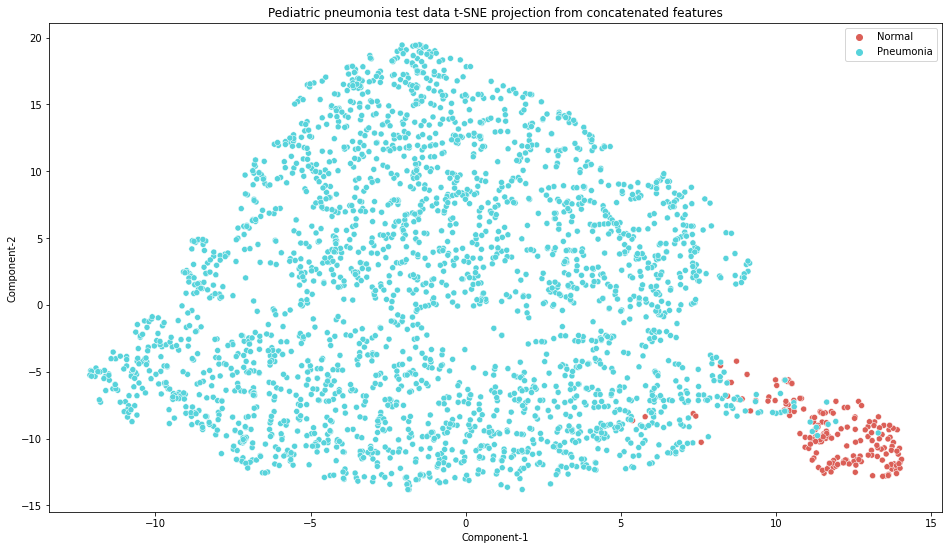

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

test_features=np.concatenate(( np.concatenate((DenseNet121_test_normal_features,DenseNet169_test_normal_features,DenseNet201_test_normal_features,MobileNet_test_normal_features),axis=1),
                              np.concatenate((DenseNet121_test_pneumonia_features,DenseNet169_test_pneumonia_features,DenseNet201_test_pneumonia_features,MobileNet_test_pneumonia_features),axis=1)))

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(test_features)
df = pd.DataFrame()
df["y"] = test_labels
df["Component-1"] = tsne_results[:,0]
df["Component-2"] = tsne_results[:,1]
category_to_label = {0: 'Normal', 1:'Pneumonia'}

plt.figure(figsize=(16,9))
sns.scatterplot(x="Component-1", y="Component-2" ,legend="full",alpha=1, hue= map(lambda x: "Normal" if x == 0 else "Pneumonia", df.y.tolist()),palette=sns.color_palette("hls", 2), data=df).set(title="Pediatric pneumonia test data t-SNE projection from concatenated features") 

In [ ]:
def metrics(test_labels, preds):
  accuracy = accuracy_score(test_labels, preds)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(test_labels, preds)
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(test_labels, preds)
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(test_labels, preds)
  print('F1 score: %f' % f1)

  fpr, tpr, _ = roc_curve(test_labels, preds)
  roc_auc = auc(fpr, tpr)
  print(roc_auc)
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
  lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")
  plt.show()


# Hyperparameter tuning

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 4.3 MB/s 
     |████████████████████████████████| 81 kB 9.2 MB/s 
     |████████████████████████████████| 210 kB 51.2 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 113 kB 49.4 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 150 kB 49.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=d966b4983649cc52e9754e5aaf2a8c1312f8448b55632c00be4d4c8531d8a475
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
def objective(trial):
  C= trial.suggest_int('C',1,20)
  kernel= trial.suggest_categorical('kernel',['linear','poly','rbf','sigmoid']) 
  gamma=trial.suggest_categorical('gamma',['scale','auto'])
  tol= trial.suggest_float('tol',1e-9,1e-3)
  clf = SVC(C=C, kernel=kernel, gamma=gamma,tol=tol)
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-14 10:51:23,420] A new study created in memory with name: no-name-c78ed06e-9417-438d-9556-d47ebaa4cf05
[I 2022-02-14 10:51:28,584] Trial 0 finished with value: 0.9858490566037735 and parameters: {'C': 6, 'kernel': 'poly', 'gamma': 'auto', 'tol': 0.0009560101737389619}. Best is trial 0 with value: 0.9858490566037735.
[I 2022-02-14 10:51:30,592] Trial 1 finished with value: 0.9811320754716981 and parameters: {'C': 20, 'kernel': 'poly', 'gamma': 'auto', 'tol': 0.0002701868422136061}. Best is trial 0 with value: 0.9858490566037735.
[I 2022-02-14 10:51:31,140] Trial 2 finished with value: 0.9706095791001451 and parameters: {'C': 13, 'kernel': 'linear', 'gamma': 'scale', 'tol': 0.0002707725256627439}. Best is trial 0 with value: 0.9858490566037735.
[I 2022-02-14 10:51:32,405] Trial 3 finished with value: 0.9716981132075472 and parameters: {'C': 14, 'kernel': 'rbf', 'gamma': 'auto', 'tol': 0.0009293535070189858}. Best is trial 0 with value: 0.9858490566037735.
[I 2022-02-14 10:51:3

Accuracy: 0.9869375907111756
Best hyperparameters: {'C': 2, 'kernel': 'poly', 'gamma': 'auto', 'tol': 0.00037225881719382957}


NORMAL SVC
Accuracy: 0.977504
Precision: 0.999205
Recall: 0.976681
F1 score: 0.987814
0.9828759777343111


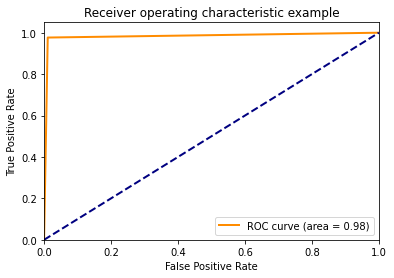

 
Accuracy: 0.986575
Precision: 0.993385
Recall: 0.992227
F1 score: 0.992806
0.9496653987711821


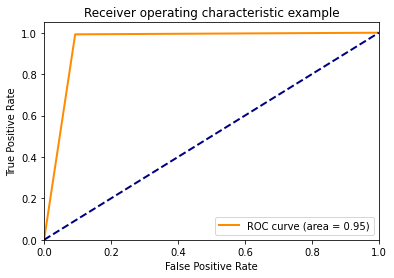

In [ ]:
print("NORMAL SVC")
clf = SVC()
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

clf = SVC(C=2,kernel='poly',tol=0.00037225881719382957,gamma='scale')
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

In [ ]:
def objective(trial):
  nu= trial.suggest_float('nu',0.1,0.5)
  kernel= trial.suggest_categorical('kernel',['linear','poly','rbf','sigmoid']) 
  gamma=trial.suggest_categorical('gamma',['scale','auto'])
  tol= trial.suggest_float('tol',1e-9,1e-3)
  probability=trial.suggest_categorical('probability',[True,False])
  
  clf = NuSVC(nu=nu, kernel=kernel, gamma=gamma,tol=tol,probability=probability)
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-14 11:02:31,615] A new study created in memory with name: no-name-66f569b6-c519-4165-9f2e-164e3ce9b291
[I 2022-02-14 11:03:06,150] Trial 0 finished with value: 0.9847605224963716 and parameters: {'nu': 0.2417525633653347, 'kernel': 'sigmoid', 'gamma': 'auto', 'tol': 0.00017499179070091554, 'probability': False}. Best is trial 0 with value: 0.9847605224963716.
[I 2022-02-14 11:04:05,780] Trial 1 finished with value: 0.977866473149492 and parameters: {'nu': 0.4824264660054314, 'kernel': 'sigmoid', 'gamma': 'scale', 'tol': 0.0009760595866528234, 'probability': False}. Best is trial 0 with value: 0.9847605224963716.
[I 2022-02-14 11:06:01,304] Trial 2 finished with value: 0.9854862119013063 and parameters: {'nu': 0.2647277287360917, 'kernel': 'linear', 'gamma': 'auto', 'tol': 0.0005769007622335468, 'probability': True}. Best is trial 2 with value: 0.9854862119013063.
[I 2022-02-14 11:07:18,626] Trial 3 finished with value: 0.9840348330914369 and parameters: {'nu': 0.165219062860

Accuracy: 0.9862119013062409
Best hyperparameters: {'nu': 0.3790954541833765, 'kernel': 'rbf', 'gamma': 'scale', 'tol': 2.522320748167019e-05, 'probability': False}


In [ ]:
def objective(trial):
  n_neighbors= trial.suggest_int('n_neighbors',5,200)
  weights= trial.suggest_categorical('weights',['uniform','distance']) 
  algorithm=trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute'])
  p= trial.suggest_categorical('p',[1,2])
  leaf_size= trial.suggest_int('leaf_size',20,50)
  
  clf = KNeighborsClassifier(n_neighbors=n_neighbors, 
                             weights=weights, algorithm=algorithm,
                             p=p,leaf_size=leaf_size)
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-14 14:01:38,469] A new study created in memory with name: no-name-33dc853d-8e45-4931-aff3-f76027cebda4
[I 2022-02-14 14:02:48,984] Trial 0 finished with value: 0.9822206095791002 and parameters: {'n_neighbors': 112, 'weights': 'distance', 'algorithm': 'auto', 'p': 1, 'leaf_size': 43}. Best is trial 0 with value: 0.9822206095791002.
[I 2022-02-14 14:03:58,139] Trial 1 finished with value: 0.9833091436865021 and parameters: {'n_neighbors': 184, 'weights': 'distance', 'algorithm': 'ball_tree', 'p': 2, 'leaf_size': 50}. Best is trial 1 with value: 0.9833091436865021.
[I 2022-02-14 14:04:54,834] Trial 2 finished with value: 0.9825834542815675 and parameters: {'n_neighbors': 163, 'weights': 'distance', 'algorithm': 'ball_tree', 'p': 1, 'leaf_size': 40}. Best is trial 1 with value: 0.9833091436865021.
[I 2022-02-14 14:05:40,269] Trial 3 finished with value: 0.9764150943396226 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'kd_tree', 'p': 2, 'leaf_size': 26}.

Accuracy: 0.9843976777939042
Best hyperparameters: {'n_neighbors': 175, 'weights': 'uniform', 'algorithm': 'brute', 'p': 2, 'leaf_size': 42}


In [ ]:
def objective(trial):
  tol= trial.suggest_float('tol',1e-10,1e-4)
  C= trial.suggest_int('C',1,20)
  penalty= trial.suggest_categorical('penalty',['l2']) 
  max_iter=trial.suggest_int('max_iter',100,500)
  
  clf = LogisticRegression(tol=tol, C=C, penalty= penalty, max_iter=max_iter)
  
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-14 15:14:11,753] A new study created in memory with name: no-name-51700f58-a846-4293-ab93-8af650af1adf
[I 2022-02-14 15:14:13,369] Trial 0 finished with value: 0.9724238026124818 and parameters: {'tol': 6.926829347248701e-05, 'C': 19, 'penalty': 'l2', 'max_iter': 399}. Best is trial 0 with value: 0.9724238026124818.
[I 2022-02-14 15:14:15,492] Trial 1 finished with value: 0.9724238026124818 and parameters: {'tol': 4.251546910418714e-05, 'C': 17, 'penalty': 'l2', 'max_iter': 418}. Best is trial 0 with value: 0.9724238026124818.
[I 2022-02-14 15:14:17,822] Trial 2 finished with value: 0.9735123367198839 and parameters: {'tol': 3.3601215698826936e-05, 'C': 2, 'penalty': 'l2', 'max_iter': 371}. Best is trial 2 with value: 0.9735123367198839.
[I 2022-02-14 15:14:20,120] Trial 3 finished with value: 0.9724238026124818 and parameters: {'tol': 1.3992548553161707e-05, 'C': 14, 'penalty': 'l2', 'max_iter': 453}. Best is trial 2 with value: 0.9735123367198839.
[I 2022-02-14 15:14:22,14

Accuracy: 0.9742380261248186
Best hyperparameters: {'tol': 3.89253667505987e-05, 'C': 1, 'penalty': 'l2', 'max_iter': 102}


In [ ]:
def objective(trial):
  n_estimators= trial.suggest_int('n_estimators',100,500)
  #splitter=trial.suggest_categorical('splitter',['best','random'])
  criterion=trial.suggest_categorical('criterion',['gini','entropy'])
  max_depth= trial.suggest_int('max_depth',1,50)
  min_samples_leaf= trial.suggest_int('min_samples_leaf',1,50)
  min_samples_split= trial.suggest_float('min_samples_split',0.1,1)
  max_features=trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2'])
  max_leaf_nodes= trial.suggest_int('max_leaf_nodes',2,20)
  min_impurity_decrease= 0.0

 
  clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                               max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                               min_samples_split=min_samples_split, max_features=max_features,
                               max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease)
  
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-14 15:17:20,656] A new study created in memory with name: no-name-c97b0d91-a21d-4c17-a625-6afd50d551bf
[I 2022-02-14 15:17:22,678] Trial 0 finished with value: 0.9800435413642961 and parameters: {'n_estimators': 462, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 0.5706276643936008, 'max_features': 'log2', 'max_leaf_nodes': 3}. Best is trial 0 with value: 0.9800435413642961.
[I 2022-02-14 15:17:23,807] Trial 1 finished with value: 0.9796806966618288 and parameters: {'n_estimators': 109, 'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 11, 'min_samples_split': 0.2084554555977674, 'max_features': 'log2', 'max_leaf_nodes': 7}. Best is trial 0 with value: 0.9800435413642961.
[I 2022-02-14 15:17:26,125] Trial 2 finished with value: 0.9800435413642961 and parameters: {'n_estimators': 201, 'criterion': 'entropy', 'max_depth': 48, 'min_samples_leaf': 3, 'min_samples_split': 0.21728976276327566, 'max_features': 'log2', 'max_leaf_nodes': 9}. 

Accuracy: 0.9847605224963716
Best hyperparameters: {'n_estimators': 213, 'criterion': 'gini', 'max_depth': 35, 'min_samples_leaf': 46, 'min_samples_split': 0.6367463761552699, 'max_features': 'log2', 'max_leaf_nodes': 19}


In [ ]:
def objective(trial):
  
  var_smoothing=trial.suggest_float('var_smoothing',1e-9,1e-3)
 
  clf = GaussianNB(var_smoothing=var_smoothing)
  
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-14 15:20:08,987] A new study created in memory with name: no-name-3e45a5ab-2ba6-458e-8d7a-51d5faaac662
[I 2022-02-14 15:20:09,333] Trial 0 finished with value: 0.9738751814223512 and parameters: {'var_smoothing': 0.00014217643053511644}. Best is trial 0 with value: 0.9738751814223512.
[I 2022-02-14 15:20:09,655] Trial 1 finished with value: 0.9669811320754716 and parameters: {'var_smoothing': 0.0008950912989777985}. Best is trial 0 with value: 0.9738751814223512.
[I 2022-02-14 15:20:09,978] Trial 2 finished with value: 0.9702467343976778 and parameters: {'var_smoothing': 0.0006868339025108484}. Best is trial 0 with value: 0.9738751814223512.
[I 2022-02-14 15:20:10,307] Trial 3 finished with value: 0.9680696661828737 and parameters: {'var_smoothing': 0.0007873415989098844}. Best is trial 0 with value: 0.9738751814223512.
[I 2022-02-14 15:20:10,624] Trial 4 finished with value: 0.9716981132075472 and parameters: {'var_smoothing': 0.0003275527253577515}. Best is trial 0 with va

Accuracy: 0.9756894049346879
Best hyperparameters: {'var_smoothing': 1.9221165312991904e-07}


In [ ]:
def objective(trial):
  splitter=trial.suggest_categorical('splitter',['best','random'])
  criterion=trial.suggest_categorical('criterion',['gini','entropy'])
  max_depth= trial.suggest_int('max_depth',1,50)
  min_samples_leaf= trial.suggest_int('min_samples_leaf',1,50)
  min_samples_split= trial.suggest_float('min_samples_split',0.1,1)
  max_features=trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2'])
  max_leaf_nodes= trial.suggest_int('max_leaf_nodes',2,20)
  min_impurity_decrease= 0.0

 
  clf = DecisionTreeClassifier(splitter=splitter, criterion=criterion,
                               max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                               min_samples_split=min_samples_split, max_features=max_features,
                               max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease)
  
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-14 15:20:48,032] A new study created in memory with name: no-name-752bc305-36fc-4408-8399-59c4703710ab
[I 2022-02-14 15:20:48,124] Trial 0 finished with value: 0.9564586357039188 and parameters: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 34, 'min_samples_leaf': 46, 'min_samples_split': 0.1837966537396658, 'max_features': 'auto', 'max_leaf_nodes': 2}. Best is trial 0 with value: 0.9564586357039188.
[I 2022-02-14 15:20:48,177] Trial 1 finished with value: 0.9742380261248186 and parameters: {'splitter': 'random', 'criterion': 'entropy', 'max_depth': 37, 'min_samples_leaf': 50, 'min_samples_split': 0.27531179267836514, 'max_features': 'auto', 'max_leaf_nodes': 18}. Best is trial 1 with value: 0.9742380261248186.
[I 2022-02-14 15:20:48,236] Trial 2 finished with value: 0.9669811320754716 and parameters: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 46, 'min_samples_leaf': 28, 'min_samples_split': 0.18066051380204107, 'max_features': 'log2', 'max_leaf_nodes': 

Accuracy: 0.9807692307692307
Best hyperparameters: {'splitter': 'random', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 0.8539096161350631, 'max_features': 'sqrt', 'max_leaf_nodes': 8}


In [ ]:
def objective(trial):
  
  n_estimators=trial.suggest_int('n_estimators',50,500)
 
  clf = AdaBoostClassifier(n_estimators=n_estimators)
  
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-14 15:49:31,713] A new study created in memory with name: no-name-b5ef868f-bde1-4c29-ae63-e9c7bf199e64
[I 2022-02-14 16:00:47,879] Trial 0 finished with value: 0.9735123367198839 and parameters: {'n_estimators': 411}. Best is trial 0 with value: 0.9735123367198839.
[I 2022-02-14 16:02:42,999] Trial 1 finished with value: 0.9749637155297532 and parameters: {'n_estimators': 71}. Best is trial 1 with value: 0.9749637155297532.
[I 2022-02-14 16:10:42,977] Trial 2 finished with value: 0.9738751814223512 and parameters: {'n_estimators': 299}. Best is trial 1 with value: 0.9749637155297532.
[I 2022-02-14 16:13:09,008] Trial 3 finished with value: 0.974600870827286 and parameters: {'n_estimators': 90}. Best is trial 1 with value: 0.9749637155297532.
[I 2022-02-14 16:24:02,682] Trial 4 finished with value: 0.9738751814223512 and parameters: {'n_estimators': 408}. Best is trial 1 with value: 0.9749637155297532.
[I 2022-02-14 16:29:01,337] Trial 5 finished with value: 0.974600870827286

In [ ]:
def objective(trial):
  n_estimators= trial.suggest_int('n_estimators',100,500)
  criterion=trial.suggest_categorical('criterion',['gini','entropy'])
  max_depth= trial.suggest_int('max_depth',1,50)
  min_samples_split= trial.suggest_float('min_samples_split',0.1,1)
  max_features=trial.suggest_categorical('max_features',['auto', 'sqrt', 'log2'])
  max_leaf_nodes= trial.suggest_int('max_leaf_nodes',2,20)
  min_impurity_decrease= 0.0

 
  clf = ExtraTreesClassifier(n_estimators=n_estimators, criterion=criterion,
                               max_depth=max_depth,
                               min_samples_split=min_samples_split, max_features=max_features,
                               max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease)
  
  clf.fit(concated_train,train_labels)
  preds=clf.predict(concated_test)
  return accuracy_score(test_labels, preds)

In [ ]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-02-23 08:34:46,078] A new study created in memory with name: no-name-54c025d2-54ac-43e9-aea8-6e11ed6dbc0a
[I 2022-02-23 08:34:48,461] Trial 0 finished with value: 0.9785921625544267 and parameters: {'n_estimators': 489, 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 0.5617508201610458, 'max_features': 'log2', 'max_leaf_nodes': 12}. Best is trial 0 with value: 0.9785921625544267.
[I 2022-02-23 08:34:50,109] Trial 1 finished with value: 0.9829462989840348 and parameters: {'n_estimators': 221, 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 0.7619034908100344, 'max_features': 'sqrt', 'max_leaf_nodes': 3}. Best is trial 1 with value: 0.9829462989840348.
[I 2022-02-23 08:34:52,260] Trial 2 finished with value: 0.9829462989840348 and parameters: {'n_estimators': 245, 'criterion': 'entropy', 'max_depth': 39, 'min_samples_split': 0.8457201499545364, 'max_features': 'auto', 'max_leaf_nodes': 14}. Best is trial 1 with value: 0.9829462989840348.
[I 2022-02-23 08:34:54

Accuracy: 0.9854862119013063
Best hyperparameters: {'n_estimators': 147, 'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 0.7627816732092868, 'max_features': 'log2', 'max_leaf_nodes': 15}


In [ ]:
print("NORMAL Catboost")
clf = CatBoostClassifier(iterations=100)
clf.fit(train_features,train_labels)
preds=clf.predict(test_features)
metrics(test_labels, preds)

NORMAL GNB
Accuracy: 0.975689
Precision: 0.996041
Recall: 0.977847
F1 score: 0.986860
0.9616010313066119


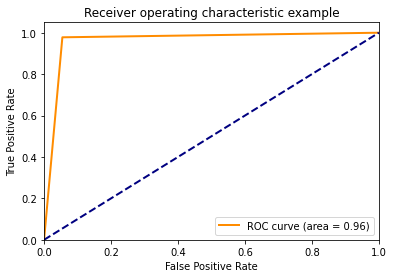

 
Accuracy: 0.975689
Precision: 0.996041
Recall: 0.977847
F1 score: 0.986860
0.9616010313066119


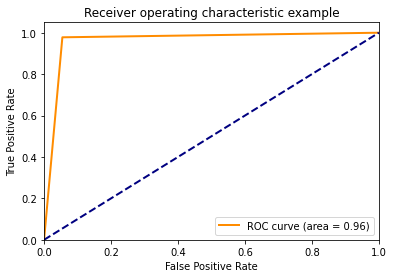

In [ ]:
print("NORMAL GNB")
clf = GaussianNB()
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")



clf = GaussianNB(var_smoothing=1.9221165312991904e-07)
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

NORMAL Random Forest
Accuracy: 0.976415
Precision: 0.999204
Recall: 0.975515
F1 score: 0.987217
0.9822930006647426


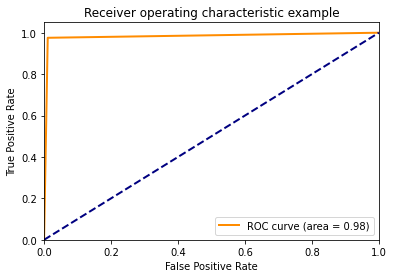

 
Accuracy: 0.986575
Precision: 0.996865
Recall: 0.988729
F1 score: 0.992780
0.9725066314969024


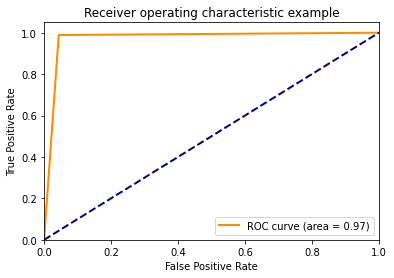

In [ ]:
print("NORMAL Random Forest")
clf = RandomForestClassifier()
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

clf = RandomForestClassifier(
    n_estimators= 213, criterion= 'gini', max_depth= 35, min_samples_leaf= 46,
 min_samples_split= 0.6367463761552699, max_features= 'log2', max_leaf_nodes= 19

)
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

NORMAL Logistic Regression
Accuracy: 0.974238
Precision: 0.999601
Recall: 0.972794
F1 score: 0.986015
0.9836649612729076


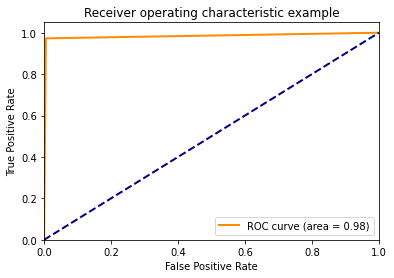

 
Accuracy: 0.974238
Precision: 0.999601
Recall: 0.972794
F1 score: 0.986015
0.9836649612729076


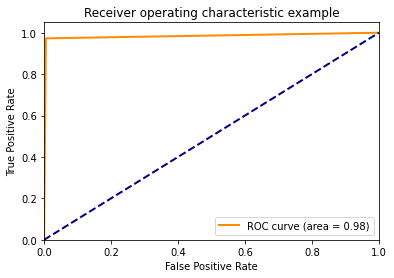

In [ ]:
print("NORMAL Logistic Regression")
clf = LogisticRegression()
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")


clf = LogisticRegression(tol=3.89253667505987e-05 , C=1, penalty='l2', max_iter=102)
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

NORMAL KNN
Accuracy: 0.974238
Precision: 0.999202
Recall: 0.973183
F1 score: 0.986021
0.9811270465256053


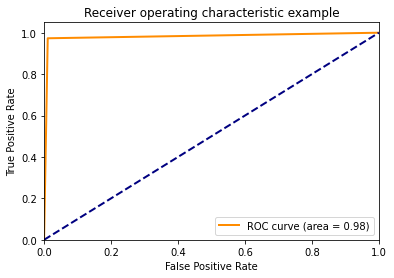

 
Accuracy: 0.984398
Precision: 0.998031
Recall: 0.985231
F1 score: 0.991590
0.978954421599672


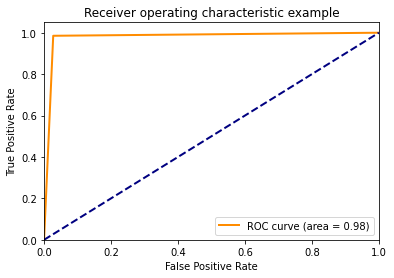

In [ ]:
print("NORMAL KNN")
clf = KNeighborsClassifier()
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

clf = KNeighborsClassifier(n_neighbors=175 , weights='uniform', algorithm= 'brute',p=2,leaf_size=42)
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

NORMAL NuSVC
Accuracy: 0.985486
Precision: 0.996862
Recall: 0.987563
F1 score: 0.992191
0.9719236544273339


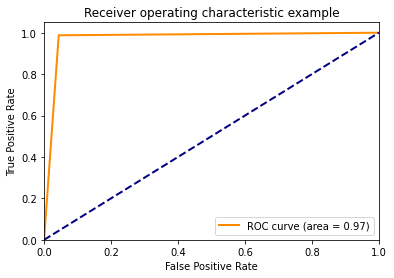

 
Accuracy: 0.986212
Precision: 0.997254
Recall: 0.987952
F1 score: 0.992581
0.9748502205543484


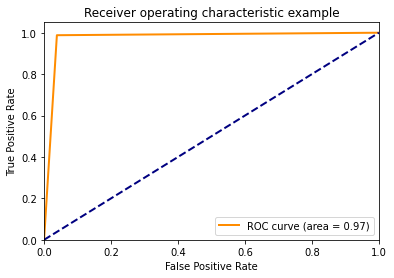

In [ ]:
print("NORMAL NuSVC")
clf = NuSVC()
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

clf = NuSVC(nu=0.3790954541833765, kernel='rbf',gamma='scale',tol= 2.522320748167019e-05,probability=False)
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

NORMAL DT
Accuracy: 0.969158
Precision: 0.997998
Recall: 0.968908
F1 score: 0.983238
0.9707927426257117


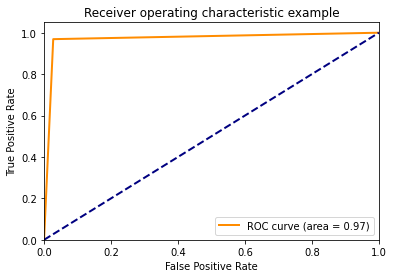

 
Accuracy: 0.977504
Precision: 0.991005
Recall: 0.984843
F1 score: 0.987914
0.9295797680409633


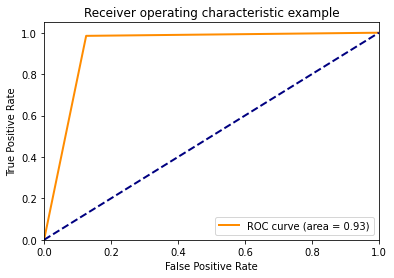

In [ ]:
print("NORMAL DT")
clf = DecisionTreeClassifier()
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")


clf = DecisionTreeClassifier(splitter='random', criterion='entropy',
                               max_depth=15, min_samples_leaf=4,
                               min_samples_split=0.8539096161350631, max_features='sqrt',
                               max_leaf_nodes=8, min_impurity_decrease=0.0)


clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

StackingClassifier
Accuracy: 0.986212
Precision: 0.995311
Recall: 0.989895
F1 score: 0.992595
0.9621606468178373


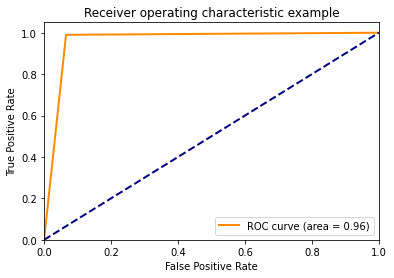

In [ ]:
print("StackingClassifier")
estimators = [
    ('SVC', SVC(C=2,kernel='poly',tol=0.00037225881719382957,gamma='scale')),
    ('KNN', KNeighborsClassifier(n_neighbors=175 , weights='uniform', algorithm= 'brute',p=2,leaf_size=42)),
    ('Xa', LogisticRegression(tol=3.89253667505987e-05 , C=1, penalty='l2', max_iter=102)),
    ('Xa2', NuSVC( nu=0.3790954541833765, kernel='rbf',gamma='scale',tol= 2.522320748167019e-05,probability=False)),    
    ('Xa3', RandomForestClassifier()),
    ('Xa5', GaussianNB()),
    ('Xa6', AdaBoostClassifier()),
    ('Xa7', BaggingClassifier(n_estimators=10)),
    ('Xa8', RandomForestClassifier(n_estimators=10)),
    ('Xa9', ExtraTreesClassifier(n_estimators=10))
]

cv= StratifiedKFold(n_splits=30)
clf = StackingClassifier(estimators=estimators, final_estimator=NuSVC(),cv=cv)
clf.fit(concated_train,train_labels)
preds=clf.predict(concated_test)
metrics(test_labels, preds)
print(" ")

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 171   12]
 [  26 2547]]


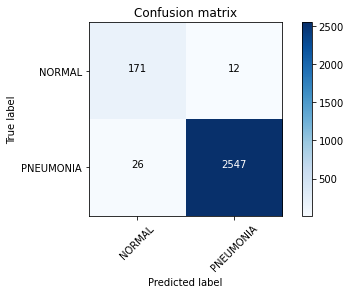

In [ ]:
cnf_matrix = confusion_matrix(test_labels,preds)

plot_confusion_matrix(cnf_matrix, classes=['NORMAL','PNEUMONIA'],
                      title='Confusion matrix')


plt.show()